In [ ]:
# Código 5.0:  Bibliotecas e programas %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#                 rode sempre este código antes dos demais

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
!pip install feature-engine  > /dev/null
# complemento '> /dev/null'  evita impressao da instalação
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import MeanEncoder

In [ ]:
# Código 5.1: Criando o dataframe kim %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Primeiro baixe o arquivo Kimsport do github e salve em seu computador
# faça o upload do arquivo no colab
kim=pd.read_excel('/content/sample_data/Kimsport.xlsx')
display(kim.head(3))
kim.info()

,CLIENTE,STATUS,UF,RESID,TMP_RESID,ESCOLARIDADE,ESTCIV,NATUREZA,IDADE,RENDA
0,LC_10000,MP,SP,sim,2a5,secundario,outros,empregado,28,145.91
1,LC_10001,MP,SP,nao,6a10,primario,solt,empregado,35,93.61
2,LC_10002,BP,SP,nao,2a5,posgrad,solt,outros,35,117.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24552 entries, 0 to 24551
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CLIENTE       24552 non-null  object 
 1   STATUS        24552 non-null  object 
 2   UF            24552 non-null  object 
 3   RESID         24552 non-null  object 
 4   TMP_RESID     24552 non-null  object 
 5   ESCOLARIDADE  24552 non-null  object 
 6   ESTCIV        24552 non-null  object 
 7   NATUREZA      24552 non-null  object 
 8   IDADE         24552 non-null  int64  
 9   RENDA         24552 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


        Frequência  Frequência Relativa
STATUS                                 
BP           17105             0.696685
MP            7447             0.303315


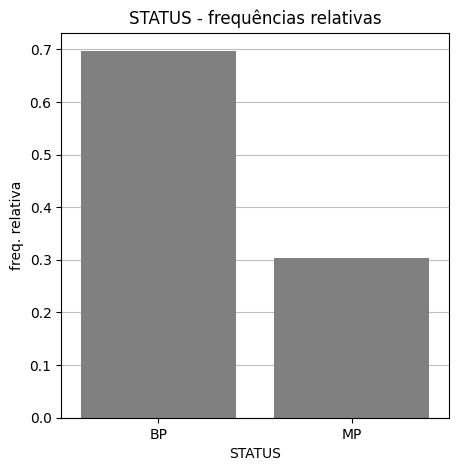

In [ ]:
#Código 5.2:Frequencias de STATUS %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencia = kim['STATUS'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['STATUS'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_freq = pd.DataFrame({'Frequência': tabela_frequencia, 'Frequência Relativa': frequencia_relativa})
print(tabela_freq)

# Diagrama de barras de STATUS  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='STATUS', y='Frequência Relativa', data=tabela_freq , color="grey")
# Adicionar título e rótulos aos eixos
plt.title('STATUS - frequências relativas')
plt.xlabel('STATUS')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
# Mostrar o gráfico
plt.show()

        Frequência  Frequência Relativa
UF                                     
MG            1034             0.042115
SP           23486             0.956582
outros          32             0.001303


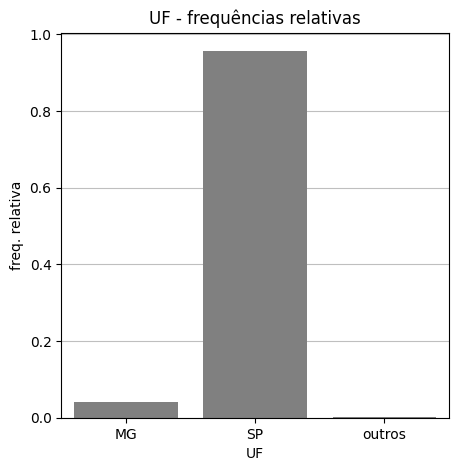

In [ ]:
#  Código 5.3:Frequencias de UF   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencias = kim['UF'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['UF'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_freq = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
print(tabela_freq)

#Diagrama de barras de UF %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='UF', y='Frequência Relativa', data=tabela_freq, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('UF - frequências relativas')
plt.xlabel('UF')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

      Frequência  Frequência Relativa
UFX                                  
NOSP        1066             0.043418
SP         23486             0.956582


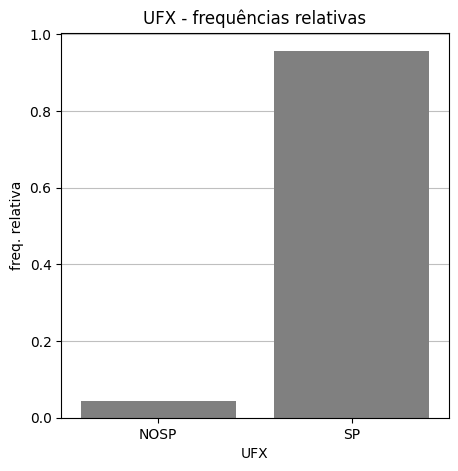

Index(['CLIENTE', 'STATUS', 'UF', 'RESID', 'TMP_RESID', 'ESCOLARIDADE',
       'ESTCIV', 'NATUREZA', 'IDADE', 'RENDA', 'UFX'],
      dtype='object')


In [ ]:
#  Código 5.4: Criando a variável UFX %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
kim['UFX'] = kim['UF'].replace({'outros': "NOSP", 'MG': "NOSP"})
kim.head(5)
# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencias = kim['UFX'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['UFX'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_fre = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
print(tabela_fre)

#Diagrama de barras de UFX %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='UFX', y='Frequência Relativa', data=tabela_fre, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('UFX - frequências relativas')
plt.xlabel('UFX')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
# Mostrar o gráfico
plt.show()
#####   note-se que o arquivo kim foi modificado agregando UFX
print(kim.columns)

       Frequência  Frequência Relativa
RESID                                 
nao         11360             0.462691
sim         13192             0.537309


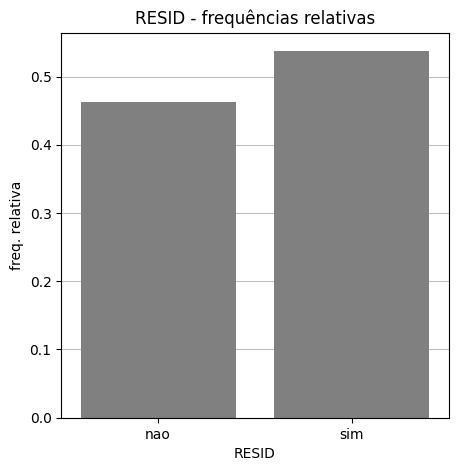

In [ ]:
# Código 5.5: Frequencias de RESID %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

tabela_frequencias = kim['RESID'].value_counts(dropna=False).sort_index()
# Calcular a frequência relativa; dropna conta dados em branco
frequencia_relativa = kim['RESID'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_freq = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
print(tabela_freq)

#Diagrama de barras de RESID %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='RESID', y='Frequência Relativa', data=tabela_freq, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('RESID - frequências relativas')
plt.xlabel('RESID')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

           Frequência  Frequência Relativa
TMP_RESID                                 
0a1              5027             0.204749
2a5              7504             0.305637
6a10             9644             0.392799
11mais           2377             0.096815


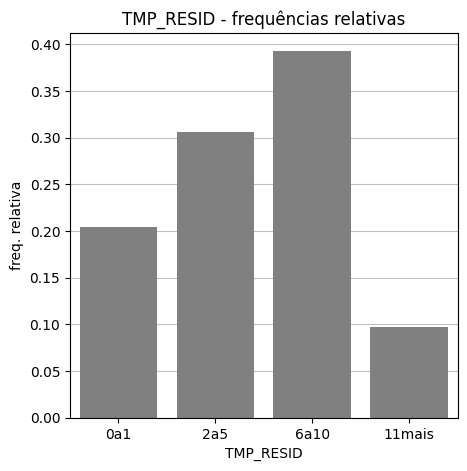

In [ ]:
# Código 5.6: Frequencias de TMP_RESID %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Definindo a ordem categórica (Não ordena o DataFrame,
# apenas define uma ordem categórica para a coluna 'TMP_RESID'.)
# Útil para gráficos ou para aplicar o comando sort_values() posteriormente
ordem_alfa= ['0a1', "2a5","6a10",'11mais']
# Definindo a ordem categórica
kim['TMP_RESID'] = pd.Categorical(kim['TMP_RESID'], categories=ordem_alfa, ordered=True)
# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencias = kim['TMP_RESID'].value_counts(dropna=False).sort_index()
# Calcular a frequência relativa; dropna conta dados em branco
frequencia_relativa = kim['TMP_RESID'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_fre = pd.DataFrame({'Frequência': tabela_frequencias,'Frequência Relativa': frequencia_relativa})
print(tabela_fre)

#Diagrama de barras de TMP_RESID %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='TMP_RESID', y='Frequência Relativa', data=tabela_fre,order=ordem_alfa, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('TMP_RESID - frequências relativas')
plt.xlabel('TMP_RESID')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

              Frequência  Frequência Relativa
ESCOLARIDADE                                 
primario            5013             0.204179
secundario          8864             0.361030
superior            8629             0.351458
posgrad             2046             0.083333


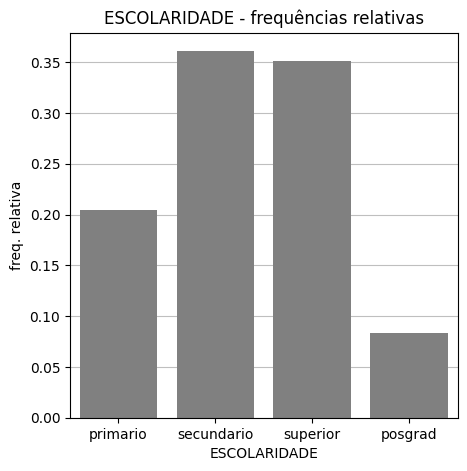

In [ ]:
#  Código 5.7: Frequencias de ESCOLARIDADE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Ordem especificada pelo analista para imprimir depois a tabela de freqs
ordem_alfa= ['primario', "secundario","superior",'posgrad'] #ordena colunas conforme desejado
# Útil para gráficos ou para aplicar o comando sort_values() posteriormente
kim['ESCOLARIDADE'] = pd.Categorical(kim['ESCOLARIDADE'], categories=ordem_alfa, ordered=True)
# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencias = kim['ESCOLARIDADE'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['ESCOLARIDADE'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_freq = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
print(tabela_freq)

# Criar o diagrama de barras %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='ESCOLARIDADE', y='Frequência Relativa', data=tabela_freq,order=ordem_alfa, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('ESCOLARIDADE - frequências relativas')
plt.xlabel('ESCOLARIDADE')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

        Frequência  Frequência Relativa
ESTCIV                                 
casad         8043             0.327590
outros        2155             0.087773
solt         14354             0.584637


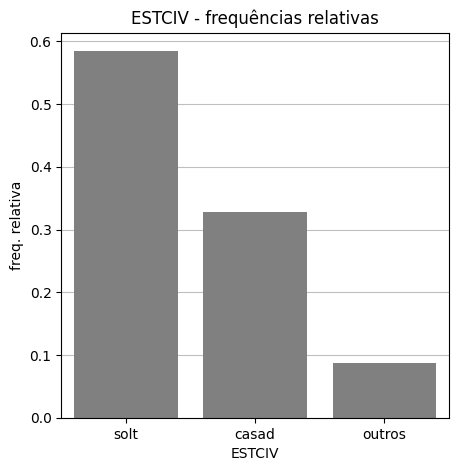

In [ ]:
# Código 5.8: Frequencias de ESTCIV %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencias = kim['ESTCIV'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['ESTCIV'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_fre = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
print(tabela_fre)

#Diagrama de barras de ESTCIV %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ordem_alfa= ['solt', "casad","outros"] #ordena colunas conforme desejado
# Calcular a frequência relativa
frequencias_relativas = kim['ESTCIV'].value_counts(normalize=True,sort=True,dropna=False).reset_index()
frequencias_relativas.columns = ['ESTCIV', 'Frequência Relativa']
# Criar o diagrama de barras
plt.figure(figsize=(5, 5))
sns.barplot(x='ESTCIV', y='Frequência Relativa', data=tabela_fre,order=ordem_alfa, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('ESTCIV - frequências relativas')
plt.xlabel('ESTCIV')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

           Frequência  Frequência Relativa
NATUREZA                                  
autonomo         2252             0.091724
empregado       17076             0.695503
outros           5224             0.212773


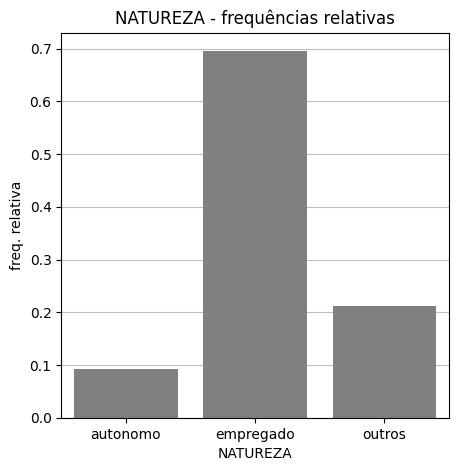

In [ ]:
# Código 5.9: Frequencias de NATUREZA %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Calcular a frequência;  dropna=False conta o número de dados em branco
tabela_frequencias = kim['NATUREZA'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['NATUREZA'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_freq = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
print(tabela_freq)

# Criar o diagrama de barras %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize=(5, 5))
sns.barplot(x='NATUREZA', y='Frequência Relativa', data=tabela_freq, color="grey")
# Adicionar título e rótulos aos eixos
plt.title('NATUREZA - frequências relativas')
plt.xlabel('NATUREZA')
plt.ylabel('freq. relativa')
# Adicionar gridlines (linhas de grade)
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

count    24552.00
mean        39.19
std          7.75
min         22.00
25%         34.00
50%         38.00
75%         44.00
max         92.00
Name: IDADE, dtype: float64


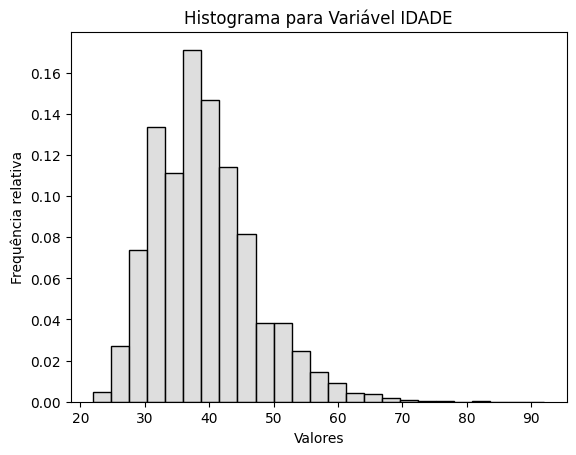

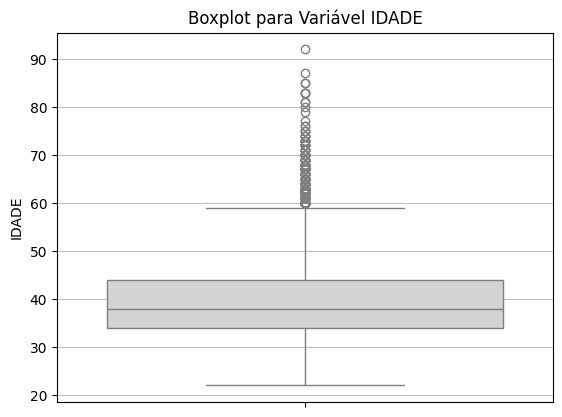

In [ ]:
#  Código 5.10: Medidas e gráficos de IDADE %%%%%%%%%%%%%%%%%%%%%%%
sumario = kim['IDADE'].describe()
sumario_arredondado = sumario.round(2)
print(sumario_arredondado)

#Criando o histograma para a variável 'IDADE'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sns.histplot(kim['IDADE'], bins=25, stat='probability', color="lightgrey" )
# Adicionando título e rótulos aos eixos
plt.title('Histograma para Variável IDADE')
plt.xlabel('Valores')
plt.ylabel('Frequência relativa')
plt.show()

# Criando o boxplot para a variável 'IDADE' %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sns.boxplot(y=kim['IDADE'],showfliers=True,color="lightgrey", orient='v')
# Adicionando título e rótulos aos eixos
plt.title('Boxplot para Variável IDADE')
plt.xlabel('')
plt.ylabel('IDADE')
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

count    24552.00
mean        77.81
std         28.11
min         50.93
25%         60.57
50%         68.02
75%         84.10
max        248.60
Name: RENDA, dtype: float64
0.01     52.2751
0.05     54.9400
0.95    135.2245
0.99    193.6174
Name: RENDA, dtype: float64


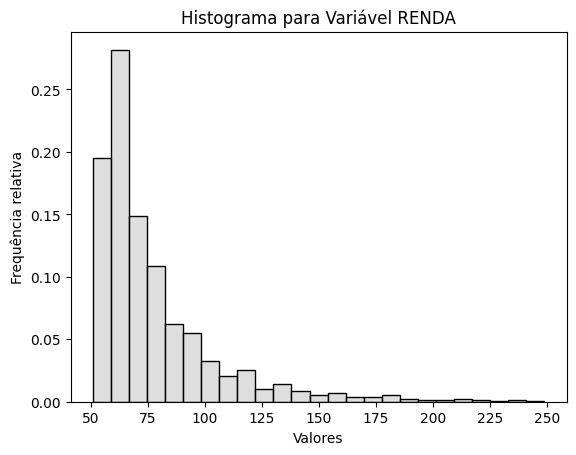

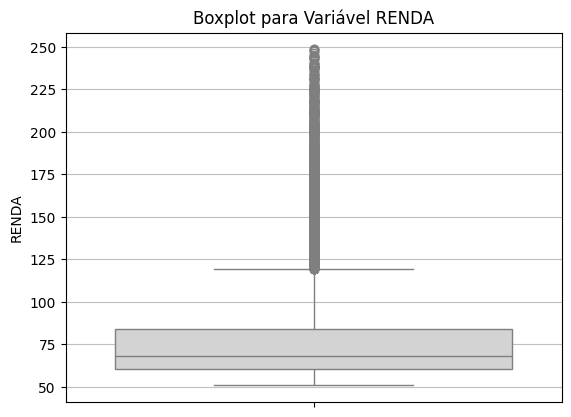

In [ ]:
#  Código 5.11: Medidas e gráficos de RENDA %%%%%%%%%%%%%%%%%%%%%%%

sumario = kim['RENDA'].describe()
sumario_arredondado = sumario.round(2)
print(sumario_arredondado)
percentis = kim['RENDA'].quantile([0.01, 0.05, 0.95,.99])
print(percentis)

#Criando o histograma para a variável 'RENDA' %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sns.histplot(kim['RENDA'], bins=25, stat='probability', color="lightgrey" )
# Adicionando título e rótulos aos eixos
plt.title('Histograma para Variável RENDA')
plt.xlabel('Valores')
plt.ylabel('Frequência relativa')
plt.show()

# Criando o boxplot para a variável 'RENDA' %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sns.boxplot(y=kim['RENDA'],showfliers=True,color="lightgrey", orient='v')
# Adicionando título e rótulos aos eixos
plt.title('Boxplot para Variável RENDA')
plt.xlabel('')
plt.ylabel('RENDA')
plt.grid(axis='y',color="gray",alpha=.5)
plt.show()

    CLIENTE STATUS  UF RESID TMP_RESID ESCOLARIDADE  ESTCIV   NATUREZA  IDADE  \
0  LC_10000     MP  SP   sim       2a5   secundario  outros  empregado     28   
1  LC_10001     MP  SP   nao      6a10     primario    solt  empregado     35   
2  LC_10002     BP  SP   nao       2a5      posgrad    solt     outros     35   
3  LC_10003     BP  SP   sim    11mais   secundario    solt  empregado     36   
4  LC_10004     BP  SP   sim      6a10   secundario   casad  empregado     50   

    RENDA UFX     NURENDA  
0  145.91  SP  -56.737790  
1   93.61  SP -110.412090  
2  117.60  SP  -78.413171  
3  104.20  SP  -94.015275  
4   70.19  SP -170.054111  


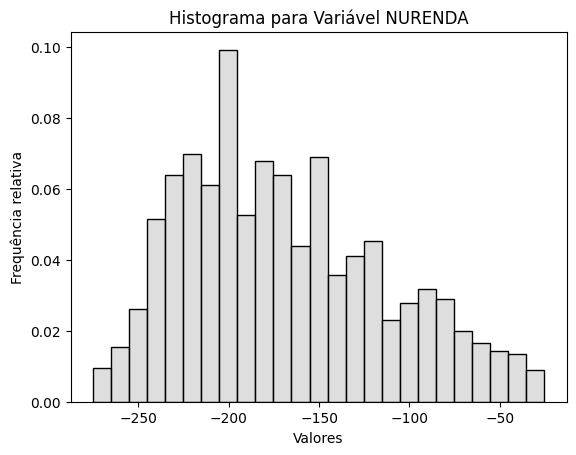

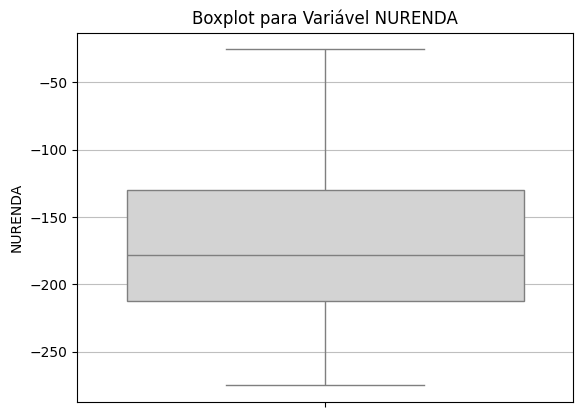

Index(['CLIENTE', 'STATUS', 'UF', 'RESID', 'TMP_RESID', 'ESCOLARIDADE',
       'ESTCIV', 'NATUREZA', 'IDADE', 'RENDA', 'UFX', 'NURENDA'],
      dtype='object')


In [ ]:
#  Código 5.12: Criando a variável NURENDA %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

kim["NURENDA"] = - 1/(kim["RENDA"]**1.5)*100000 #100000 para manter ordem de grandeza
print(kim.head(5))

#Criando o histograma para a variável 'NURENDA' %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sns.histplot(kim['NURENDA'], bins=25, stat='probability', color="lightgrey" )
# Adicionando título e rótulos aos eixos
plt.title('Histograma para Variável NURENDA')
plt.xlabel('Valores')
plt.ylabel('Frequência relativa')
# Mostrando o gráfico
plt.show()

# Criando o boxplot para a variável 'NURENDA' %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
sns.boxplot(y=kim['NURENDA'],showfliers=True,color="lightgrey", orient='v')
# Adicionando título e rótulos aos eixos
plt.title('Boxplot para Variável NURENDA')
plt.xlabel('')
plt.ylabel('NURENDA')
plt.grid(axis='y',color="gray",alpha=.5)
# Mostrando o gráfico
plt.show()
print(kim.columns) #aqrquivo kim modificado com mais uma variável NURENDA

In [ ]:
# Código 5.13: Discretização de IDADE em 10 classes com decis %%%%%%%%%%%%%%%%%
kim['KIDADE']= pd.qcut(kim['IDADE'], q=10) # divide em 10 classes de mesma freq.
tabela_frequencias = kim['KIDADE'].value_counts(dropna=False).sort_index()
frequencia_relativa = kim['KIDADE'].value_counts(normalize=True,dropna=False).sort_index()
# Criar uma nova tabela com a frequência e a frequência relativa
tabela_freq = pd.DataFrame({'Frequência': tabela_frequencias, 'Frequência Relativa': frequencia_relativa})
tabela_freq=tabela_freq.round(2)
print(tabela_freq)
print("\n")
print(kim.columns)
print("\n")
del kim['KIDADE'] #apaga a coluna criada para ilustrar discretização
print(kim.columns)

                Frequência  Frequência Relativa
KIDADE                                         
(21.999, 30.0]        2597                 0.11
(30.0, 33.0]          3277                 0.13
(33.0, 35.0]          2730                 0.11
(35.0, 36.0]          1446                 0.06
(36.0, 38.0]          2755                 0.11
(38.0, 40.0]          2450                 0.10
(40.0, 42.0]          2146                 0.09
(42.0, 45.0]          2547                 0.10
(45.0, 49.0]          2204                 0.09
(49.0, 92.0]          2400                 0.10


Index(['CLIENTE', 'STATUS', 'UF', 'RESID', 'TMP_RESID', 'ESCOLARIDADE',
       'ESTCIV', 'NATUREZA', 'IDADE', 'RENDA', 'UFX', 'NURENDA', 'KIDADE'],
      dtype='object')


Index(['CLIENTE', 'STATUS', 'UF', 'RESID', 'TMP_RESID', 'ESCOLARIDADE',
       'ESTCIV', 'NATUREZA', 'IDADE', 'RENDA', 'UFX', 'NURENDA'],
      dtype='object')


In [ ]:
# Código 5.14: Discretização de IDADE utilizando DecisionTreeRegressor %%%%%%%%%%

df = kim[['IDADE', 'STATUS']].copy()
df['STATUS'] = df['STATUS'].map({'MP': 1, 'BP': 0})
print(df.head(5))
# Treina uma árvore de decisão com idade; alvo=STATUS
tree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1000)
tree.fit(df[['IDADE']], df['STATUS'])
# Extrair thresholds (pontos de corte)
thresholds = tree.tree_.threshold
thresholds = thresholds[thresholds != -2]  # remove nós folha sem interesse
thresholds = sorted(thresholds)
# Definindo os limites dos intervalos
bins = [-np.inf] + thresholds + [np.inf]
# Discretizando a variável idade
df['idade_discretizada'] = pd.cut(df['IDADE'], bins=bins)
# Criar a tabela de frequências com os intervalos reais
frequencias = df['idade_discretizada'].value_counts().sort_index()
# Montar DataFrame final com os limites
tabela_frequencias = pd.DataFrame({
    'Intervalo de IDADE': [f'({interval.left}, {interval.right}]' for interval in frequencias.index],
    'Frequência': frequencias.values})
print(tabela_frequencias)

# Tabela cruzada entre faixas de idade e a variável alvo 'STATUS' %%%%%%%%%%%%%%
tabela_cruzada = pd.crosstab(df['idade_discretizada'], df['STATUS'])

# Para deixar os intervalos mais legíveis
tabela_cruzada.index = [f'({interval.left}, {interval.right}]' for interval in tabela_cruzada.index]
print(tabela_cruzada)
frequencia_relativa = pd.crosstab(df['idade_discretizada'], df['STATUS'], normalize='index')
frequencia_relativa.index = [f'({interval.left}, {interval.right}]' for interval in frequencia_relativa.index]
frequencia_relativa.columns = ['BP', 'MP']
print(frequencia_relativa.round(2))

   IDADE  STATUS
0     28       1
1     35       1
2     35       0
3     36       0
4     50       0
  Intervalo de IDADE  Frequência
0       (-inf, 28.5]        1233
1       (28.5, 30.5]        1364
2       (30.5, 32.5]        2068
3       (32.5, 36.5]        5385
4       (36.5, 38.5]        2755
5        (38.5, inf]       11747
STATUS           0     1
(-inf, 28.5]   129  1104
(28.5, 30.5]   542   822
(30.5, 32.5]  1153   915
(32.5, 36.5]  3686  1699
(36.5, 38.5]  2052   703
(38.5, inf]   9543  2204
                BP    MP
(-inf, 28.5]  0.10  0.90
(28.5, 30.5]  0.40  0.60
(30.5, 32.5]  0.56  0.44
(32.5, 36.5]  0.68  0.32
(36.5, 38.5]  0.74  0.26
(38.5, inf]   0.81  0.19


In [ ]:
# Código 5.15: Discretizando com bins arbitrariamente selecionados %%%%%%%%

X= kim[['IDADE', 'STATUS']].copy()
idades_discretizadas = pd.cut(X['IDADE'],
                              bins=[0., 34.5, 37.5, 41.5, 45.5, 50.5, 100], right=False)
# gerando o resultado
result = pd.DataFrame({'IDADE': X['IDADE'], 'Faixa Etária': idades_discretizadas})
print('\n')
# Calcular a frequência de cada classe
freq = result['Faixa Etária'].value_counts(sort=True,dropna=False).reset_index()
# ordenando a saida
freq_ordenado = freq.sort_values(by='Faixa Etária')
print( freq_ordenado)
#se quisessemos utilizar no futuro, devemos colocar ("apendar") a nova variavel no arquivo kim
#kim['Faixa Etária'] = idades_discretizadas



    Faixa Etária  count
0    [0.0, 34.5)   7223
2   [34.5, 37.5)   4189
1   [37.5, 41.5)   4996
3   [41.5, 45.5)   3540
4   [45.5, 50.5)   2575
5  [50.5, 100.0)   2029


In [ ]:
#  Código 5.16: Gerando  K dummies para a variável ESTCIV %%%%%%%%%%%%%%%%%%%%%%%
# apenas para ilustração. Não está no capítulo 5
# Criando um novo DataFrame sem a coluna primeira coluna
df_novo = kim.drop(columns=[kim.columns[0]])
df_dummies = pd.get_dummies(df_novo, dtype=int)
aux1=kim[['ESTCIV']]  #[[]] cria no formato data frame
aux2=df_dummies[['ESTCIV_casad', 'ESTCIV_outros', 'ESTCIV_solt']]
aux1=pd.concat([aux1,aux2],axis=1)
print(aux1.head(5))
print(df_dummies.columns)

   ESTCIV  ESTCIV_casad  ESTCIV_outros  ESTCIV_solt
0  outros             0              1            0
1    solt             0              0            1
2    solt             0              0            1
3    solt             0              0            1
4   casad             1              0            0
Index(['IDADE', 'RENDA', 'NURENDA', 'STATUS_BP', 'STATUS_MP', 'UF_MG', 'UF_SP',
       'UF_outros', 'RESID_nao', 'RESID_sim', 'TMP_RESID_0a1', 'TMP_RESID_2a5',
       'TMP_RESID_6a10', 'TMP_RESID_11mais', 'ESCOLARIDADE_primario',
       'ESCOLARIDADE_secundario', 'ESCOLARIDADE_superior',
       'ESCOLARIDADE_posgrad', 'ESTCIV_casad', 'ESTCIV_outros', 'ESTCIV_solt',
       'NATUREZA_autonomo', 'NATUREZA_empregado', 'NATUREZA_outros',
       'UFX_NOSP', 'UFX_SP'],
      dtype='object')


In [ ]:
#  Código 5.17: Gerando  K-1  dummies para a variável ESTCIV %%%%%%%%%%%%%%%%%%%%
# Criando um novo DataFrame sem a coluna k-ésima
df_novo = kim.drop(columns=[kim.columns[0]])
# Gerando K-1 dummies para as variáveis qualitativas
df_dummies = pd.get_dummies(df_novo, dtype=int, drop_first=True)
aux1=kim[['ESTCIV']]
aux2=df_dummies[['ESTCIV_outros', 'ESTCIV_solt']]
aux1=pd.concat([aux1,aux2],axis=1)
print(aux1.head(5))

   ESTCIV  ESTCIV_outros  ESTCIV_solt
0  outros              1            0
1    solt              0            1
2    solt              0            1
3    solt              0            1
4   casad              0            0


In [ ]:
# Código 5.18: codificação utilizando  MEAN ENCODING para ESCOLARIDADE %%%%%%%%%

aux=kim.copy()
X=aux[['ESCOLARIDADE']]
y=aux['STATUS']
mapa={'MP': 1, 'BP': 0}
y= y.map(mapa)

me = MeanEncoder()
me.fit(X,y)
pmp=me.transform(X)
prim=pd.concat([aux['ESCOLARIDADE'],pmp],axis=1)
print(prim.head(5))

   ESCOLARIDADE  ESCOLARIDADE
0    secundario      0.344314
1      primario      0.372232
2       posgrad      0.178886
3    secundario      0.344314
4    secundario      0.344314


In [ ]:
#  Código 5.19: WOE encoding exemplo  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

aux=kim.copy()
X=aux[['ESCOLARIDADE']]
y=aux['STATUS']
mapa={'MP': 1, 'BP': 0}
y = y.map(mapa)
woe = WoEEncoder()
woe.fit(X, y)
aux1=woe.transform(X)
prim=pd.concat([aux['ESCOLARIDADE'],aux1],axis=1)
prim.columns=['ESCOLARIDADE','WOE']
print(prim.head(5))

  ESCOLARIDADE       WOE
0   secundario  0.187432
1     primario  0.308907
2      posgrad -0.692356
3   secundario  0.187432
4   secundario  0.187432


In [ ]:
# Código 5.20: criando versão modificada do kimsport: kimsport5 %%%%%%%%%%%%%

#incluindo as variaveis UFX e NURENDA, deletando UF e RENDA

#arquivo ('kimsport5.xlsx') será utilizado nos códigos do capítulo 6 (CS_cap6)

kim5=kim.copy()
del kim5['UF']
del kim5['RENDA']
print(kim5.columns)
!pip install openpyxl > /dev/null
kim5.to_excel('kimsport5.xlsx', index=False)
from google.colab import files
files.download('kimsport5.xlsx')